In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.size'] = 15  # 固定字体大小
plt.rcParams['font.sans-serif']=['SimSun'] # 用来正常显示中文标签，使用宋体
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

In [2]:
N = lambda x: np.exp(-(x[0] * x[0] + x[1] * x[1]) / 2) / (2 * np.pi)  # 二维正态分布

In [3]:
x = np.arange(-5, 5, 0.01)
y = np.arange(-5, 5, 0.01)
X, Y = np.meshgrid(x, y)
Z = N((X, Y))

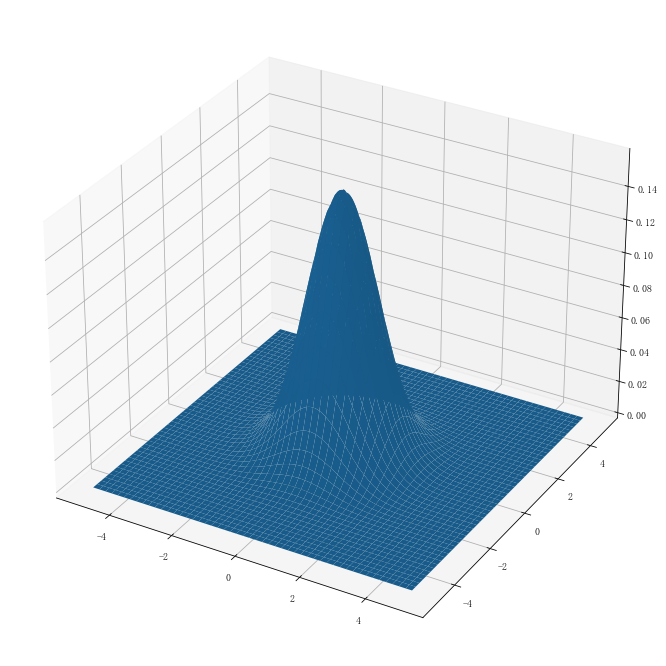

In [4]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)

In [5]:
normol = np.zeros((3, 3)).tolist()
for i in range(3):
    for j in range(3):
        normol[i][j] = N((i-1, j-1))
normol /= np.sum(normol)
normol

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

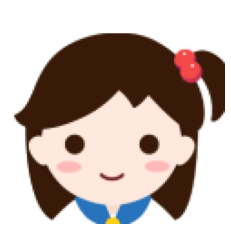

In [6]:
from PIL import Image
image = Image.open('littleBing.png')
image = np.asarray(image)
# plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [7]:
n, m, k = image.shape
print(f'{image.shape=}')

image.shape=(120, 120, 4)


In [8]:
kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])  # 边缘提取
#kernel = np.array([[0, 1, 1], [-1, 0, 1], [-1, -1, 0]])  # 边缘提取
#kernel = np.array([[1/9] * 3] * 3)  # 取平均（极差）
#kernel = normol
kernel

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

In [9]:
image = image[:, :, 0:3]
out = np.zeros((n-2, m-2, 3))

for i in range(n - 2):
    for j in range(m - 2):
        for k in range(3):
            out[i][j][k] = np.sum(kernel * image[i:i+3, j:j+3, k])
            #out[i][j][k] = max(0, out[i][j][k])
            #out[i][j][k] = min(255, out[i][j][k])
mn, mx = np.min(out), np.max(out)
if mn < 0:
    out = (out - mn) / (mx - mn) * 255
out = out.astype(np.uint8)
np.min(out), np.max(out)

(0, 255)

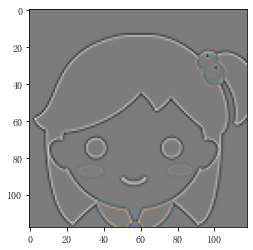

In [10]:
# plt.figure(figsize=(50, 50))
plt.imshow(out)
plt.show()

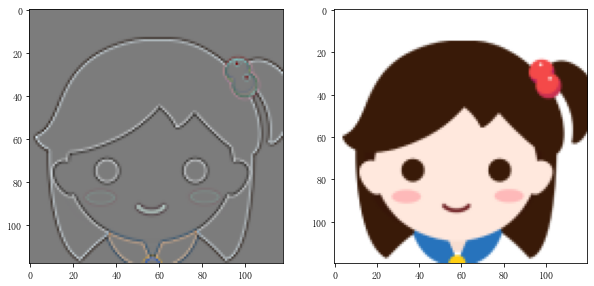

In [11]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(out)
plt.subplot(122)
plt.imshow(image)
plt.show()